### Decision Tree on Bank Marketing Data

#### Step 1: Load Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Loading Dataset
df = pd.read_csv(r"E:\Datasets\bank_marketing.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### Step 2: Preprocess Dataset

In [6]:
# shape of dataset, rows and columns
df.shape

(11162, 17)

In [8]:
# Dataset describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


##### 1. Check Missing Values

In [11]:
# Checking missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### 2. Handle Duplicates

In [12]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

##### 3. Label Encoding

In [15]:
# Label Encoding Categorical columns
cat_cols = df.select_dtypes(include='object').columns

label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

##### 4. Check Correlation

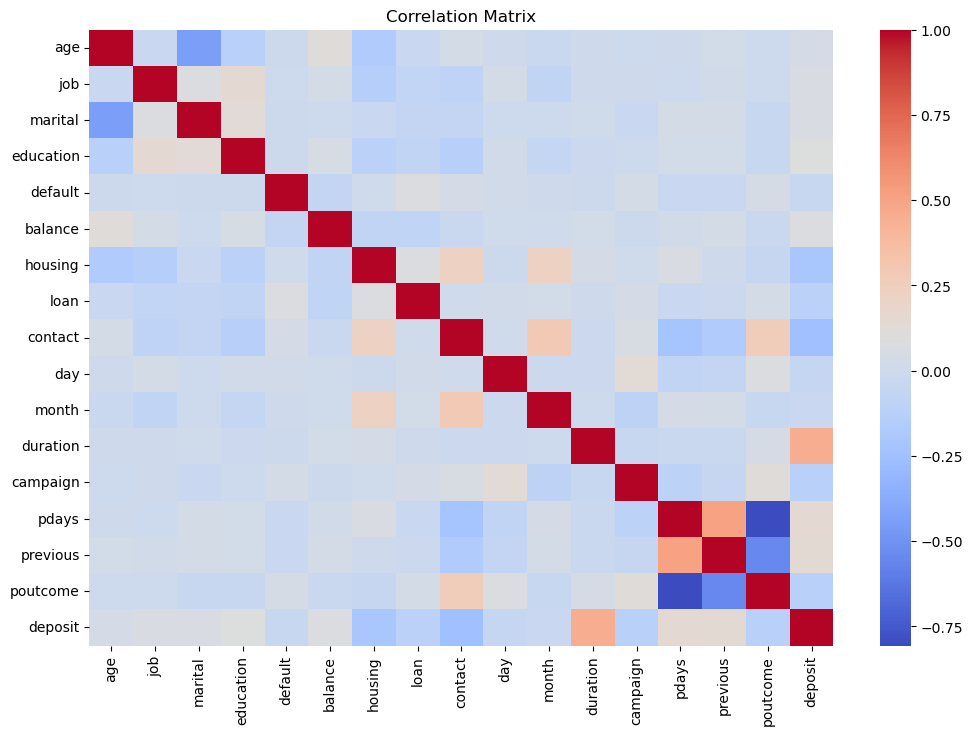

In [17]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Step 3: Train and Test sets

In [18]:
X = df.drop(columns=['deposit'])
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

#### Step 4: Scaling Features

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Step 5: Model Building

In [20]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Step 6: Model Evaluation

In [22]:
y_pred = model.predict(X_test)

##### 1. Accuracy

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Scores: ", accuracy)

Accuracy Scores:  0.8051948051948052


##### 2. Confusion Matrix

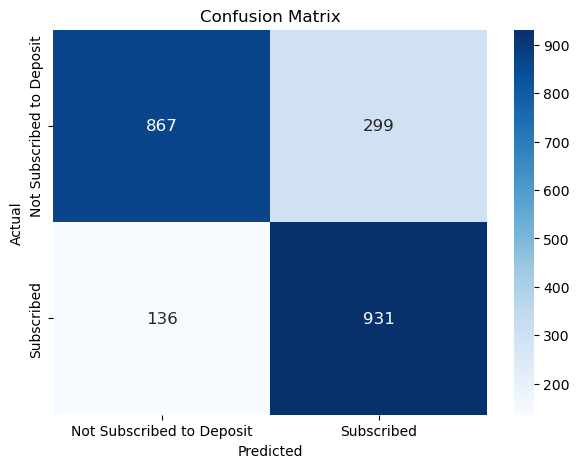

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels = ['Not Subscribed to Deposit', 'Subscribed'],
            yticklabels = ['Not Subscribed to Deposit','Subscribed'],
            annot_kws = {"size":12})
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### 3. Classification Report

In [30]:
class_report = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      1166
           1       0.76      0.87      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.80      2233



0 --> Not subscribed to deposit, 1--> subscribed to deposit
##### Precision
- 0.86 - When Model predicted "No", it was correct 86% of the time
- 0.76 - When Model predicted "Yes", it was correct 76% of the time
##### Recall
- 0.74 - Of all real "No" cases, 74% were correctly predicted
- 0.87 - Of all real "Yes" cases, 87% were correctly predicted
##### F1-Score
- Balance between Precision and Recall

#### Step 7: Visualize Decision Tree

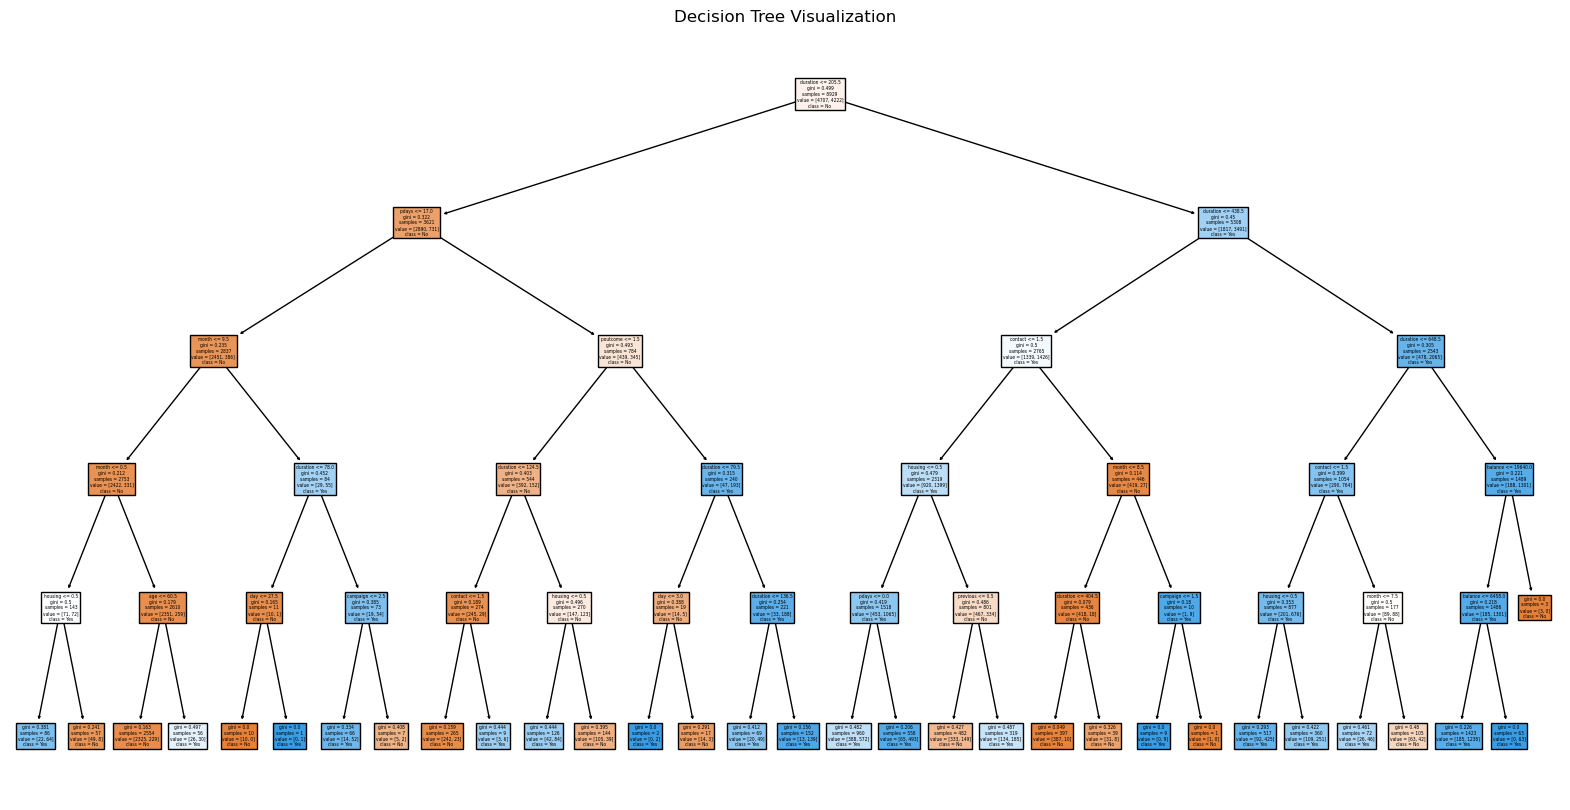

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()